<a href="https://colab.research.google.com/github/margomeza16/mlds6_proyecto/blob/master/docs/data/data_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Report

Este documento contiene los resultados del análisis exploratorio de los datos.

Para realizar el análisis exploratorio de los datos se utilizaron las siguientes **librerías**. 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from skimage.util import img_as_ubyte
from statsmodels.multivariate.manova import MANOVA
import cv2
from statistics import mean
import os, random
from scipy import stats
# Seleccionamos una semilla para los RNG
tf.random.set_seed(0)
np.random.seed(0)

## Resumen general de los datos

Los datos corresponden a imágenes reales de endoscopías con diagnósticos de patologías gastrointestinales o del colón, verificadas y etiquetadas por médicos especialistas en el área. Dentro de las patologías diagnosticadas se encuentran: *Ulcerative colitis*, *Esophagitis*, *Polyps* ó *Normal* (Sin patología).

Las imágenes se encuentran en formato .JPG, que según la fuente original ((https://dl.acm.org/doi/pdf/10.1145/3083187.3083212) cuentan con diferentes resoluciones que van desde los 459x459 hasta 1920x1920 píxeles. El conjunto de datos de entrenamiento se integró por 3200 imágenes distribuidos en 800 por cada clase.

A continuación, se presenta una descripción más detallada de los datos.


In [ ]:
# Carga de los datos.
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/MLDL6/
#Descargamos imágenes de entrenamiento
!unzip /content/drive/MyDrive/MLDL6/train.zip -d /tmp/train/

Primero construimos el Dataframe con la clase, el ancho y la altura de las imagenes.

In [ ]:
Clase, Ancho, Altura = [],[],[]
for i, val in enumerate(["0_normal/", "1_ulcerative_colitis/", "2_polyps/", "3_esophagitis/"]):
    temp_path = f"/tmp/train/{val}"
    for im_path in os.listdir(temp_path):
        image = cv2.imread(temp_path+im_path)
        Clase.append(i)
        Ancho.append(image.shape[1])
        Altura.append(image.shape[1])

df_images = pd.DataFrame({'Clase':Clase,"Ancho":Ancho,"Altura":Altura})

Visualicemos el número de imágenes de acuerdo al tamaño real discriminadas por clase mediante un histograma.

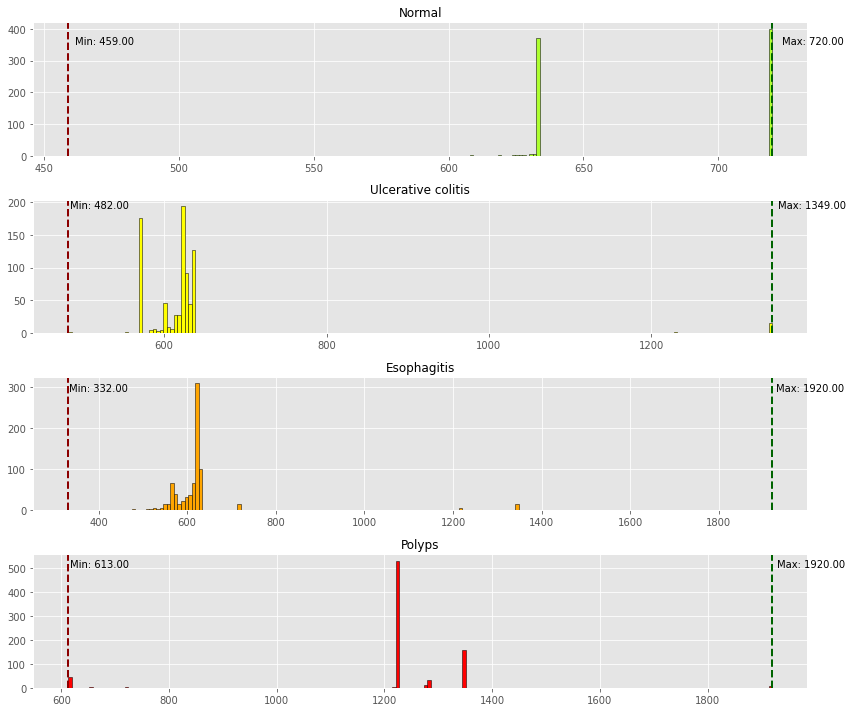

In [ ]:
n_bins = 200
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(12, 10))

axes[0].hist(df_images[df_images['Clase'] == 0]['Ancho'],n_bins,histtype='bar',color='greenyellow',edgecolor = "black")
axes[0].set_title('Normal', fontsize = 12)
axes[0].axvline(max(df_images[df_images['Clase'] == 0]['Ancho']), color='darkgreen', linestyle='dashed', linewidth=2)
axes[0].axvline(min(df_images[df_images['Clase'] == 0]['Ancho']), color='darkred', linestyle='dashed', linewidth=2)
min_ylim_a, max_ylim_a = plt.ylim()
axes[0].text(min(df_images[df_images['Clase'] == 0]['Ancho'])*1.005, max_ylim_a*350,
             'Min: {:.2f}'.format(min(df_images[df_images['Clase'] == 0]['Ancho'])))
axes[0].text(max(df_images[df_images['Clase'] == 0]['Ancho'])*1.005, max_ylim_a*350,
             'Max: {:.2f}'.format(max(df_images[df_images['Clase'] == 0]['Ancho'])))


axes[1].hist(df_images[df_images['Clase'] == 1]['Ancho'],n_bins,histtype='bar',color='yellow',edgecolor = "black")
axes[1].set_title('Ulcerative colitis', fontsize = 12)
axes[1].axvline(max(df_images[df_images['Clase'] == 1]['Ancho']), color='darkgreen', linestyle='dashed', linewidth=2)
axes[1].axvline(min(df_images[df_images['Clase'] == 1]['Ancho']), color='darkred', linestyle='dashed', linewidth=2)
min_ylim_a, max_ylim_a = plt.ylim()
axes[1].text(min(df_images[df_images['Clase'] == 1]['Ancho'])*1.005, max_ylim_a*190,
             'Min: {:.2f}'.format(min(df_images[df_images['Clase'] == 1]['Ancho'])))
axes[1].text(max(df_images[df_images['Clase'] == 1]['Ancho'])*1.005, max_ylim_a*190,
             'Max: {:.2f}'.format(max(df_images[df_images['Clase'] == 1]['Ancho'])))

axes[2].hist(df_images[df_images['Clase'] ==2]['Ancho'],n_bins,histtype='bar',color='orange',edgecolor = "black")
axes[2].set_title('Esophagitis', fontsize = 12)
axes[2].axvline(max(df_images[df_images['Clase'] == 2]['Ancho']), color='darkgreen', linestyle='dashed', linewidth=2)
axes[2].axvline(min(df_images[df_images['Clase'] == 2]['Ancho']), color='darkred', linestyle='dashed', linewidth=2)
min_ylim_a, max_ylim_a = plt.ylim()
axes[2].text(min(df_images[df_images['Clase'] == 2]['Ancho'])*1.005, max_ylim_a*290,
             'Min: {:.2f}'.format(min(df_images[df_images['Clase'] == 2]['Ancho'])))
axes[2].text(max(df_images[df_images['Clase'] == 2]['Ancho'])*1.005, max_ylim_a*290,
             'Max: {:.2f}'.format(max(df_images[df_images['Clase'] == 2]['Ancho'])))

axes[3].hist(df_images[df_images['Clase'] == 3]['Ancho'],n_bins,histtype='bar',color='red',edgecolor = "black")
axes[3].set_title('Polyps', fontsize = 12)
axes[3].axvline(max(df_images[df_images['Clase'] == 3]['Ancho']), color='darkgreen', linestyle='dashed', linewidth=2)
axes[3].axvline(min(df_images[df_images['Clase'] == 3]['Ancho']), color='darkred', linestyle='dashed', linewidth=2)
min_ylim_a, max_ylim_a = plt.ylim()
axes[3].text(min(df_images[df_images['Clase'] == 3]['Ancho'])*1.005, max_ylim_a*0.9,
             'Min: {:.2f}'.format(min(df_images[df_images['Clase'] == 3]['Ancho'])))
axes[3].text(max(df_images[df_images['Clase'] == 3]['Ancho'])*1.005, max_ylim_a*0.9,
             'Max: {:.2f}'.format(max(df_images[df_images['Clase'] == 3]['Ancho'])))
plt.tight_layout()
plt.show()

Los histogramas nos muestran que:

*   Para la clase *normal* el tamaño de imágenes de 633x633 presentó el mayor número de imágenes. En esta clase las imágenes más pequeñas fueron de 459x459, mientras que las más grandes fueron de 720x720.

*   Para la clase *Ulcerative colitis* el tamaño de imágenes de 623x623 presentó el mayor número de imágenes. En esta clase las imágenes más pequeñas fueron de 459x459, mientras que las más grandes fueron de 1349x1349.

*   Para la clase *Esophagitis* el tamaño de imágenes de 622x622 presentó el mayor número de imágenes. En esta clase las imágenes más pequeñas fueron de 332x332, mientras que las más grandes fueron de 1920x1920.

*   Para la clase *Polyps* el tamaño de imágenes de 1221x1221 presentó el mayor número de imágenes. En esta clase las imágenes más pequeñas fueron de 613x613, mientras que las más grandes fueron de 1920x1920.

Así mismo, podemos apreciar la distribución de los tamaños de imágenes por clase considerando que todas las imágenes son cuadradas, es decir, el ancho es igual al alto.

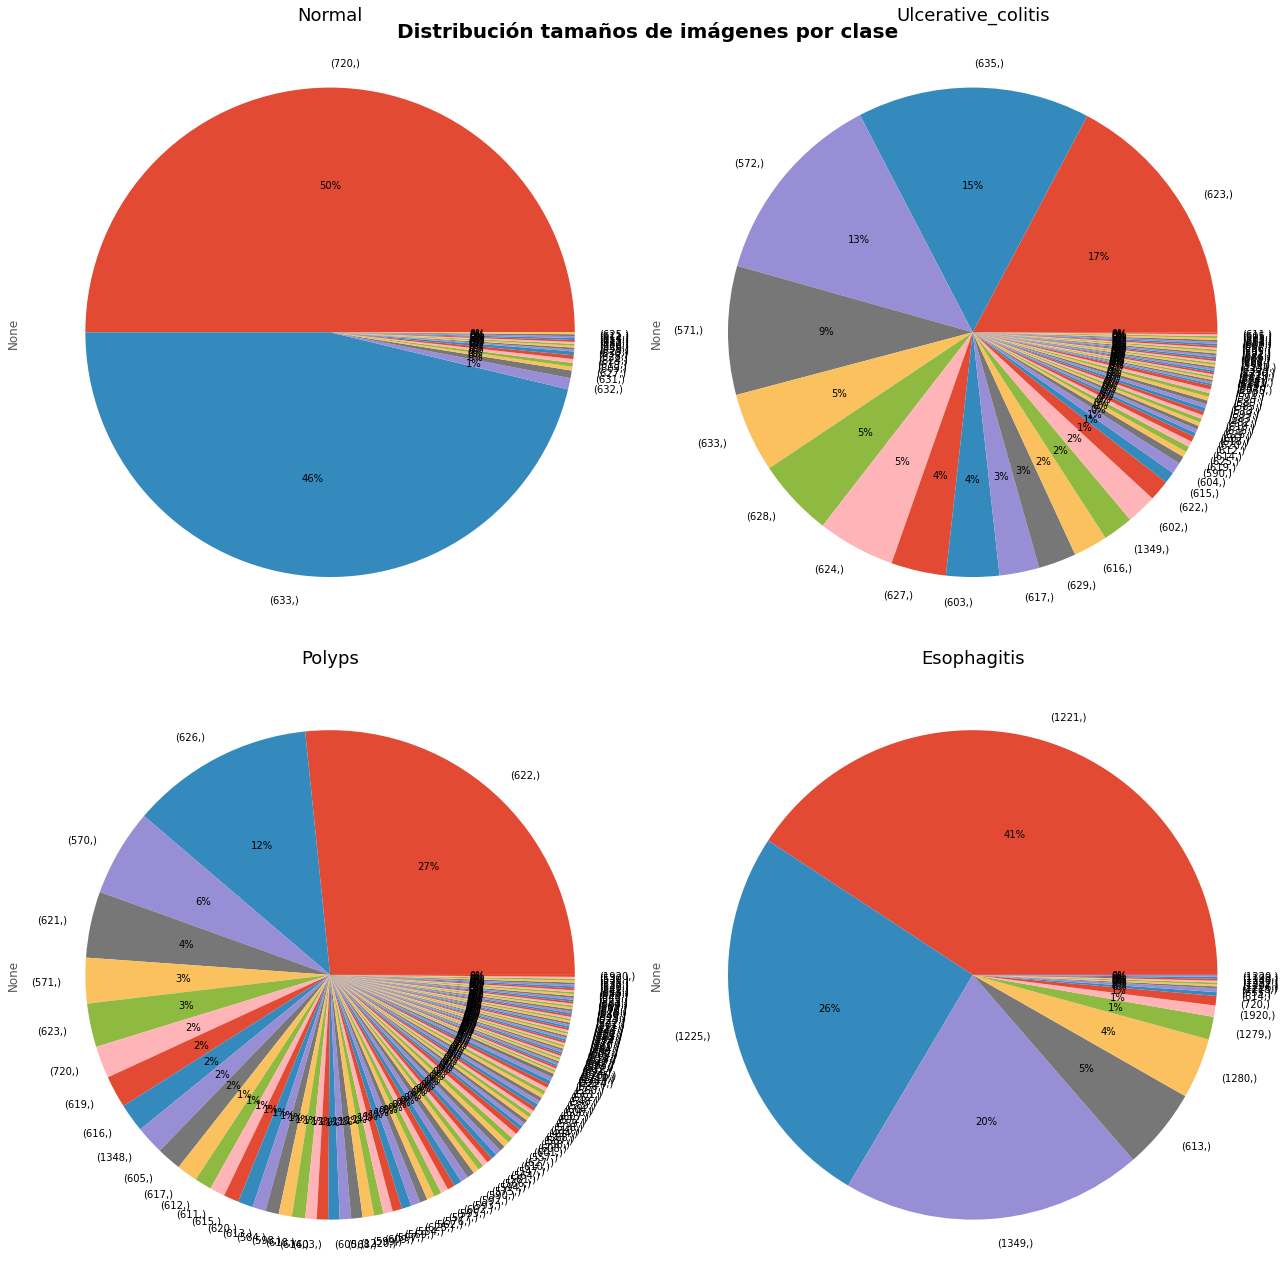

In [ ]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Distribución tamaños de imágenes por clase',
            fontweight ="bold",fontsize= 20)

axes[0,0] = df_images[df_images['Clase'] == 0]['Ancho'].to_frame().value_counts().plot(kind='pie', figsize=(18,18),
            fontsize=10,autopct='%1.0f%%',ax=axes[0,0])
axes[0,0].set_title('Normal', fontsize = 18)

axes[0,1] = df_images[df_images['Clase'] == 1]['Ancho'].to_frame().value_counts().plot(kind='pie', figsize=(18,18),
            fontsize=10,autopct='%1.0f%%',ax=axes[0,1])
axes[0,1].set_title('Ulcerative_colitis', fontsize = 18)

axes[1,0] = df_images[df_images['Clase'] == 2]['Ancho'].to_frame().value_counts().plot(kind='pie', figsize=(18,18),
            fontsize=10,autopct='%1.0f%%',ax=axes[1,0])
axes[1,0].set_title('Polyps', fontsize = 18)

axes[1,1] = df_images[df_images['Clase'] == 3]['Ancho'].to_frame().value_counts().plot(kind='pie', figsize=(18,18),
            fontsize=10,autopct='%1.0f%%',ax=axes[1,1])
axes[1,1].set_title('Esophagitis', fontsize = 18)
plt.tight_layout()
plt.show()

Como se puede apreciar la clase de *Polyps* presenta una mayor variabilidad en los tamaños de imágenes, mientras que en la clase *normal* predominan los tamaños de imágenes de 720x720 y 633x633. La clase *Ulcerative colitis* presenta una distribución balanceada de tamaños de imágenes.

## Resumen de la calidad de los datos

El conjunto de datos proviene del sitio web de Kaggle, quienes corresponden a una comunidad en línea de científicos de datos y profesionales del aprendizaje de máquinas. Esta fuente es bastante confiable ya que se encuentra soportada por diversos *papers* publicados en revistas científicas de gran reconocimiento.

En este caso puntual el conjunto de datos se compuso por imágenes reales de endoscopías con diagnósticos de patologías gastrointestinales o del colón, verificadas y etiquetadas por médicos especialistas en el área. El cual fue implementado en la realización del estudio *Kvasir: A Multi-Class Image Dataset for Computer AidedGastrointestinal Disease Detection*.

Mencionado lo anterior en primera instancia se revisó si los datos se encontraban balanceados. Visualicemos la distribución de las clases en los datos.

Los datos corresponden a imágenes reales de endoscopías con diagnósticos de patologías gastrointestinales o del colón, verificadas y etiquetadas por médicos especialistas en el área. Dentro de las patologías diagnosticadas se encuentran: *Ulcerative colitis*, *Esophagitis*, *Polyps* ó  *Normal* (Sin patología).




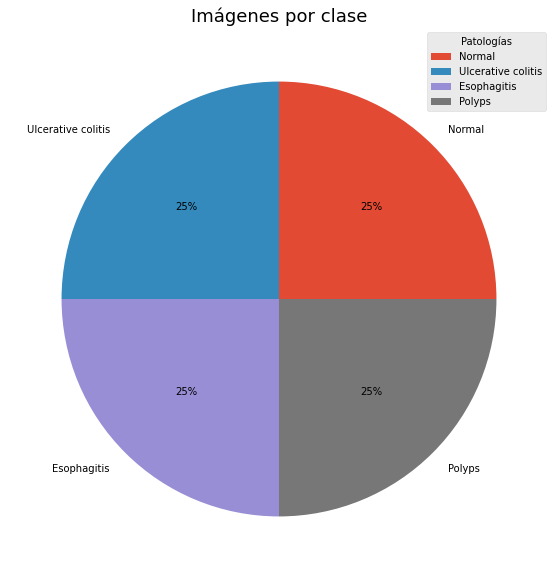

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_images['Clase'].to_frame().value_counts(),
        labels = ['Normal', 'Ulcerative colitis', 'Esophagitis','Polyps'],autopct='%.0f%%')
plt.legend(title = "Patologías")
plt.title('Imágenes por clase', fontsize = 18)
plt.show() 

Como se puede apreciar las clases se encuentran correctamente equilibradas, lo cual demuestra que el conjunto de datos se encuentra balanceado. La calidad de los datos en este sentido resulta una gran ventaja, ya que permite generar modelos con una mayor exactitud y tasa de detección equilibrada.

## Variable objetivo

A continuación se presentan las diferentes clases asociadas a la variable respuesta correspondientes a las patologías de: *Ulcerative colitis*, *Esophagitis*, *Polyps* o *Normal*.

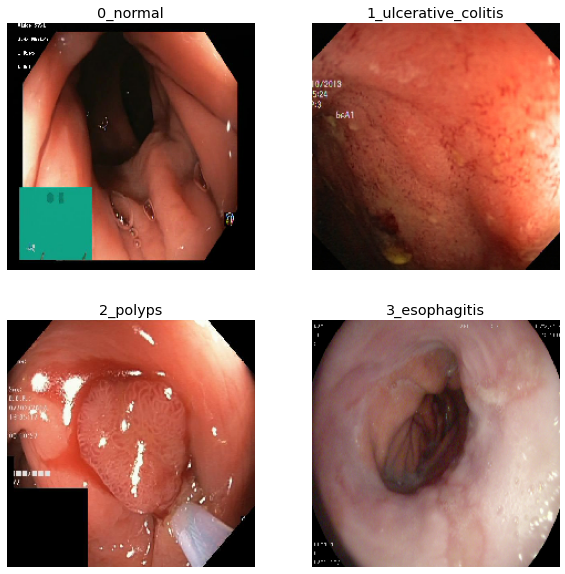

In [ ]:
# nombres de las etiquetas
class_dict = {0:'0_normal', 1:'1_ulcerative_colitis', 2:'2_polyps', 3:'3_esophagitis'}

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    cat_path = f"/tmp/train/{class_dict[i]}/"
    img = tf.keras.preprocessing.image.load_img(cat_path+random.choice(os.listdir(cat_path)),
                                                target_size=(224, 224, 3))
    ax[i//2, i%2].imshow(img); ax[i//2, i%2].axis("off")
    ax[i//2, i%2].set_title(class_dict[i])

## Variables individuales

El conjunto de imágenes de las endoscopías son de tipo RGB, también denominadas imágenes de color real, las cuales se almacenan como un arreglo de datos $m$ x $n$ x $3$ que definen los componentes de color rojo, verde y azul para cada píxel individual. El color de cada píxel se determina mediante la combinación de las intensidades de rojo, verde y azul almacenadas en cada plano de color de la ubicación del píxel. A continuación, se muestran algunas características asociadas a las imágenes como lo es la distribución de intensidad de las imágenes por cada clase.

En particular, las imágenes de intensidad se codifican como una matriz de dos dimensiones, donde cada número representa la intensidad de un píxel. Generalmente los elementos de una imagen de intensidad son de clase enteros de 8 Bits (*uint8*), es decir $2^8$ y tienen valores enteros en el rango de $[0,255]$. Revisamos la distribución de intensidad de píxel por clase.

In [ ]:
# Leemos las imagenes como arreglos numpy preprocesandolos con el mismo tamaño (224,224,3).
# Esto para poder operar correctamente las matrices

all_images = []
labels = []
for i, val in enumerate(["0_normal/", "1_ulcerative_colitis/", "2_polyps/", "3_esophagitis/"]):
    temp_path = f"/tmp/train/{val}"
    for im_path in os.listdir(temp_path):
        all_images.append(np.array(tf.keras.preprocessing.image.load_img(temp_path+im_path,
                                                                         target_size=(224, 224, 3))))
        labels.append(i)
X_train = np.array(all_images)
y_train = np.array(labels)

In [ ]:
# Con el método flatten reducimos a una sola dimensión cada imagen (array)
img_flatten= []
for i in range(len(X_train)):
    img_flatten.append(X_train[i].flatten())

img_flatten_normal = img_flatten[:800]
img_flatten_ulcerative_colitis = img_flatten[800:1600]
img_flatten_polyps = img_flatten[1600:2400]
img_flatten_esophagitis = img_flatten[2400:3200]

Construimos un arreglo de 150.528 píxeles resultantes del proceso de reducción de dimensión es decir: $224$ X $224$ X $3$ por cada una de las clases.

In [ ]:
res_0,res_1,res_2,res_3 = [],[],[],[]
prom_0,prom_1,prom_2,prom_3 = [],[],[],[]

#Promedio de intensidad de valores clase 0
for i in range(len(img_flatten_normal[0])):
    for l in img_flatten_normal:
        prom_0.append(l[i])
    mean(prom_0)
    res_0.append(mean(prom_0))
    prom_0 = []

#Promedio de intensidad de valores clase 1
for i in range(len(img_flatten_normal[0])):
    for l in img_flatten_ulcerative_colitis:
        prom_1.append(l[i])
    mean(prom_1)
    res_1.append(mean(prom_1))
    prom_1 = []

#Promedio de intensidad de valores clase 2
for i in range(len(img_flatten_normal[0])):
    for l in img_flatten_polyps:
        prom_2.append(l[i])
    mean(prom_2)
    res_2.append(mean(prom_2))
    prom_2 = []

#Promedio de intensidad de valores clase 3
for i in range(len(img_flatten_normal[0])):
    for l in img_flatten_esophagitis:
        prom_3.append(l[i])
    mean(prom_3)
    res_3.append(mean(prom_3))
    prom_3 = []

Finalmente, revisemos el **promedio de la intensidad de los pixeles por cada clase** mediante histogramas.

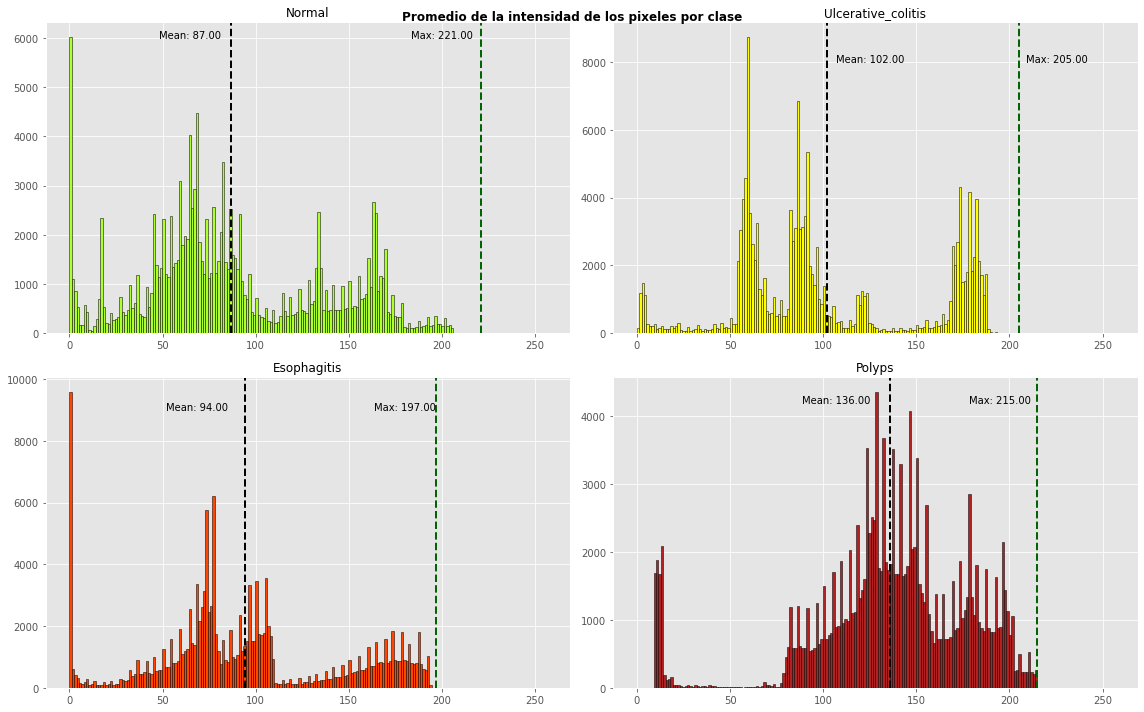

In [ ]:
n_bins = 200
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,figsize=(16, 10))
fig.suptitle('Promedio de la intensidad de los pixeles por clase',
            fontweight ="bold",fontsize= 12)

ax0.hist(res_0,n_bins,histtype='bar',range=[0,256],color='greenyellow',edgecolor = "black")
ax0.set_title('Normal', fontsize = 12)
ax0.axvline(mean(res_0), color='black', linestyle='dashed', linewidth=2)
ax0.axvline(max(res_0), color='darkgreen', linestyle='dashed', linewidth=2)
min_ylim_0, max_ylim_0 = plt.ylim()
ax0.text(mean(res_0)*0.55, max_ylim_0*6000, 'Mean: {:.2f}'.format(mean(res_0)))
ax0.text(max(res_0)*0.83, max_ylim_0*6000, 'Max: {:.2f}'.format(max(res_0)))

ax1.hist(res_1,n_bins,histtype='bar',range=[0,256],color='yellow',edgecolor = "black")
ax1.set_title('Ulcerative_colitis', fontsize = 12)
ax1.axvline(mean(res_1), color='black', linestyle='dashed', linewidth=2)
ax1.axvline(max(res_1), color='darkgreen', linestyle='dashed', linewidth=2)
ax1.text(mean(res_1)*1.05, max_ylim_0*8000, 'Mean: {:.2f}'.format(mean(res_1)))
ax1.text(max(res_1)*1.02, max_ylim_0*8000, 'Max: {:.2f}'.format(max(res_1)))

ax2.hist(res_2,n_bins,histtype='bar',range=[0,256],color='orangered',edgecolor = "black")
ax2.set_title('Esophagitis', fontsize = 12)
ax2.axvline(mean(res_2), color='black', linestyle='dashed', linewidth=2)
ax2.axvline(max(res_2), color='darkgreen', linestyle='dashed', linewidth=2)
ax2.text(mean(res_2)*0.55, max_ylim_0*9000, 'Mean: {:.2f}'.format(mean(res_2)))
ax2.text(max(res_2)*0.83, max_ylim_0*9000, 'Max: {:.2f}'.format(max(res_2)))


ax3.hist(res_3,n_bins,histtype='bar',range=[0,256],color='firebrick',edgecolor = "black")
ax3.set_title('Polyps', fontsize = 12)
ax3.axvline(mean(res_3), color='black', linestyle='dashed', linewidth=2)
ax3.axvline(max(res_3), color='darkgreen', linestyle='dashed', linewidth=2)
ax3.text(mean(res_3)*0.65, max_ylim_0*4200, 'Mean: {:.2f}'.format(mean(res_3)))
ax3.text(max(res_3)*0.83, max_ylim_0*4200, 'Max: {:.2f}'.format(max(res_3)))

plt.tight_layout()
plt.show()

Los histogramas muestran la distribución de la intensidad de pixeles por cada clase, la media y el valor máximo. De acuerdo a las figuras podemos apreciar que:

*   La patología *normal* a pesar de los valores que se concentran en el valor 0 (negro) la distribución se asemeja a una distribución normal.

*   La patología *Ulcerative colitis* parece presentar un patron de distribución normal en tres (3) intervalos [0,90],[91, 150] y [151,205].

*   La patología *Esophagitis* pareciera presentar una distribución similar a la Poisson ya que los valores se concentral en 0.

*   La patología *Polypsl* presenta una distribución que se asemeja a una distribución normal.

## Clasificación de las variables

Las imágenes estan divididas en cuatro (4) clases que correspoden a las patologías de *Normal*, *Ulcerative colitis*, *Esophagitis* y *Polyps*. Los detalles de las tamaños y tipo de imágenes se profundizan en los anteriores numerales.

## Relación entre las variables explicativas y la variable objetivo

Las relaciones entre los canales y las clases de las imágenes se exploraron inicialmente mediante un análisis gráfico de los promedios de valores de píxel por cada canal (R,G,B) para cada clase: *Normal*, *Ulcerative colitis*, *Esophagitis* y *Polyps*. Posteriormente se realizó un **Análisis multivariante de varianza (MANOVA)** para verificar si existen diferencias significativas entre el factor (Clases) y los efectos individuales (R,G,B) de estos. A continuación, se presentan los resultados de estos análisis y los scripts implementados en ellos.

In [ ]:
# Extraemos el valor promedio de pixel por cada canal (R,G,B) por cada clase

num_pix = X_train[0].size/3 # Se divide en 3 para obtener el número de pixeles por canal 
R = []
G = []
B = []

for i in range(X_train.shape[0]):
  r,g,b = cv2.split(X_train[i])
  R.append(float(np.sum(r)) / num_pix) # Promedio de valor de pixel en el canal rojo por imagen
  G.append(float(np.sum(g)) / num_pix) # Promedio de valor de pixel en el canal verde por imagen
  B.append(float(np.sum(b)) / num_pix) # Promedio de valor de pixel en el canal azul por imagen
  
# Promedio de valores por canal para la clase "Normal" 
mean_R_X_normal = mean(R[:800])
mean_G_X_normal = mean(G[:800])
mean_B_X_normal = mean(B[:800])

# Promedio de valores por canal para la clase "Ulcerative_colitis" 
mean_R_X_ulcerative_colitis = mean(R[800:1600])
mean_G_X_ulcerative_colitis = mean(G[800:1600])
mean_B_X_ulcerative_colitis = mean(B[800:1600])

# Promedio de valores por canal para la clase "Polyps" 
mean_R_X_polyps = mean(R[1600:2400])
mean_G_X_polyps = mean(G[1600:2400])
mean_B_X_polyps = mean(B[1600:2400])

# Promedio de valores por canal para la clase "Polyps" 
mean_R_X_esophagitis = mean(R[2400:3200])
mean_G_X_esophagitis = mean(G[2400:3200])
mean_B_X_esophagitis = mean(B[2400:3200])


Ahora visualicemos los promedios de los valores de píxel por cada canal (R,G,B) por cada clase.

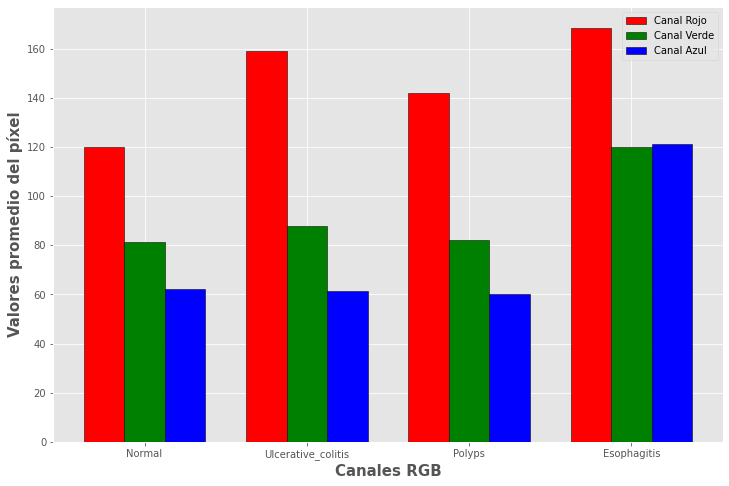

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Rojo = [mean_R_X_normal,mean_R_X_ulcerative_colitis,mean_R_X_polyps,mean_R_X_esophagitis]
Verde = [mean_G_X_normal,mean_G_X_ulcerative_colitis,mean_G_X_polyps,mean_G_X_esophagitis]
Azul = [mean_B_X_normal,mean_B_X_ulcerative_colitis,mean_B_X_polyps,mean_B_X_esophagitis]
 
# Set position of bar on X axis
br1 = np.arange(len(Rojo))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Rojo, color ='r', width = barWidth,
        edgecolor ='black', label ='Canal Rojo')
plt.bar(br2, Verde, color ='g', width = barWidth,
        edgecolor ='black', label ='Canal Verde')
plt.bar(br3, Azul, color ='b', width = barWidth,
        edgecolor ='black', label ='Canal Azul')
 
# Adding Xticks
plt.xlabel('Canales RGB', fontweight ='bold', fontsize = 15)
plt.ylabel('Valores promedio del píxel', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Rojo))],
        ['Normal', 'Ulcerative_colitis', 'Polyps', 'Esophagitis'])
 
plt.legend()
plt.show()

Como se puede apreciar la patología *Esophagitis* presente el mayor promedio de valores en cada banda, mientras que el gráfico muestra que existe una similitud entre los valores promedio de las bandas verde y azul para las patologías *Normal*, *Ulcerative colitis* y *Polyps*.

Para verificar si existen diferencias significativas entre el factor (Clases) y las variables respuestas (R,G,B) de estos se optó por realizar una **Análisis multivariante de varianza (MANOVA)**. Este proporciona un análisis de regresión y un análisis de varianza para variables dependientes múltiples por una o más covariables o variables de factor. Permitiendo contrastar la hipótesis nula de que los vectores de medias de los grupos no son significativamente diferentes.

$H_0$: Los vectores de medias de los grupos no son significativamente diferentes.


In [ ]:
# Se construye el Dataframe del promedio de los valores de los pixeles por banda para cada imagen.
df = pd.DataFrame({'R':R,'G':G,'B':B,'y':y_train})

# Se entrena un modelo MANOVA
fit = MANOVA.from_formula('R + G + B ~ y', data=df)
print(fit.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0671 3.0000 3196.0000 14812.2784 0.0000
         Pillai's trace  0.9329 3.0000 3196.0000 14812.2784 0.0000
 Hotelling-Lawley trace 13.9039 3.0000 3196.0000 14812.2784 0.0000
    Roy's greatest root 13.9039 3.0000 3196.0000 14812.2784 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             y            Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.4504 3.0000 3196.0000 1299.9612 0.0000
           Pilla

De acuerdo a los resultados de la MANOVA las pruebas de *Wilk's lambda*, *Pillai's trace*, *Hotelling-Lawley trace* y *Roy's greatest root* son estadísticamente significativas (p < 0.001) e índican que las patologías presentan diferencias estadísticamente significativas entre si.


